In [10]:
import random
import math
import matplotlib.pyplot as plt

In [35]:
def generate_cvrp_data(num_customers=20, vehicle_capacity=100, max_demand=30, map_size=100):
    depot = {'id': 0, 'x': map_size / 2, 'y': map_size / 2, 'demand': 0}
    customers = []

    for i in range(1, num_customers + 1):
        x = random.uniform(0, map_size)
        y = random.uniform(0, map_size)
        demand = random.randint(1, max_demand)
        customers.append({'id': i, 'x': x, 'y': y, 'demand': demand})

    return depot, customers, vehicle_capacity

In [36]:
depot, customers, vehicle_capacity = generate_cvrp_data()

In [37]:
depot

{'id': 0, 'x': 50.0, 'y': 50.0, 'demand': 0}

In [38]:
customers

[{'id': 1, 'x': 49.94384475029977, 'y': 5.498687928990864, 'demand': 24},
 {'id': 2, 'x': 27.145843330307397, 'y': 53.484109417810814, 'demand': 20},
 {'id': 3, 'x': 45.29129780387, 'y': 43.659072061910145, 'demand': 16},
 {'id': 4, 'x': 82.84173614344338, 'y': 81.06339425478714, 'demand': 11},
 {'id': 5, 'x': 7.466185001999759, 'y': 8.681648276164156, 'demand': 30},
 {'id': 6, 'x': 5.170336251284269, 'y': 16.405997879590373, 'demand': 27},
 {'id': 7, 'x': 44.30525465670314, 'y': 6.373187000432889, 'demand': 2},
 {'id': 8, 'x': 42.237284585014415, 'y': 95.86982837192929, 'demand': 20},
 {'id': 9, 'x': 61.03831012850536, 'y': 81.62295561628406, 'demand': 26},
 {'id': 10, 'x': 3.308864585706406, 'y': 34.12628617974103, 'demand': 25},
 {'id': 11, 'x': 63.76070100648579, 'y': 0.342071201120675, 'demand': 16},
 {'id': 12, 'x': 2.736394174894863, 'y': 66.05481597045907, 'demand': 27},
 {'id': 13, 'x': 69.41927272115981, 'y': 80.40447636908567, 'demand': 16},
 {'id': 14, 'x': 36.6540086466553

In [39]:
vehicle_capacity

100

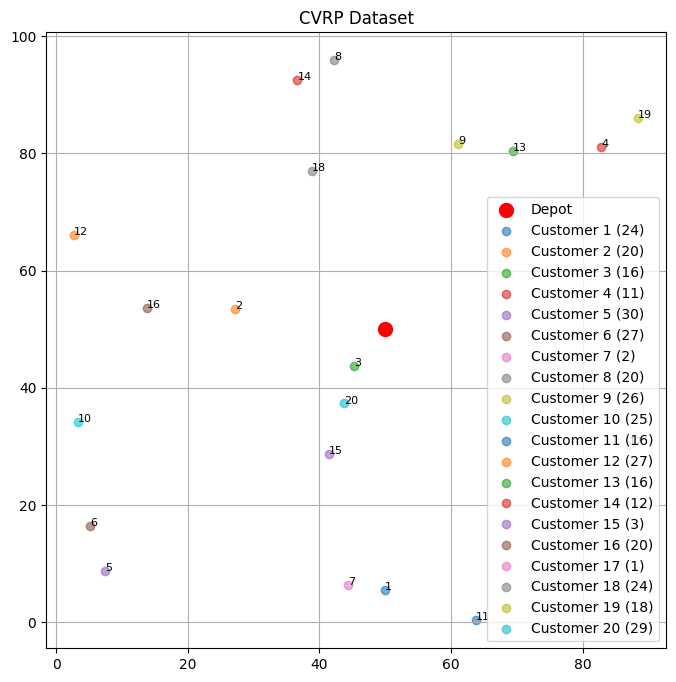

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(depot['x'], depot['y'], color='red', label='Depot', s=100)
for c in customers:
    plt.scatter(c['x'], c['y'], label=f"Customer {c['id']} ({c['demand']})", alpha=0.6)
    plt.text(c['x'], c['y'], str(c['id']), fontsize=8)

plt.title('CVRP Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
def compute_polar_angle(customer, depot):
    dx = customer["x"] - depot["x"]
    dy = customer["y"] - depot["y"]
    angle = math.atan2(dy, dx) # angle in radian
    return math.degrees(angle) % 360 # angle of (dx, dy) with the positive x-axis

In [47]:
# basically sweep a polar around depot to find clusters
# cluster-first-round-second
def sweeping(depot, customers, vehicle_capacity):
    for customer in customers:
        customer["angle"] = compute_polar_angle(customer, depot)
    sorted_customers = sorted(customers, key=lambda x: x["angle"])
    print(sorted_customers)
    routes = []
    current_route = []
    current_load = 0
    for customer in sorted_customers:
        demand = customer["demand"]
        if current_load + demand > vehicle_capacity:
            routes.append(current_route)
            current_load = 0
            current_route = []
        current_route.append(customer)
        current_load += demand
    if current_route:
        routes.append(current_route)
    return routes

In [43]:
routes = sweeping(depot,customers, vehicle_capacity)

[{'id': 19, 'x': 88.39412023873477, 'y': 86.02411467809861, 'demand': 18, 'angle': 43.17591164497347}, {'id': 4, 'x': 82.84173614344338, 'y': 81.06339425478714, 'demand': 11, 'angle': 43.40599346059027}, {'id': 13, 'x': 69.41927272115981, 'y': 80.40447636908567, 'demand': 16, 'angle': 57.433717794372356}, {'id': 9, 'x': 61.03831012850536, 'y': 81.62295561628406, 'demand': 26, 'angle': 70.75794626220497}, {'id': 8, 'x': 42.237284585014415, 'y': 95.86982837192929, 'demand': 20, 'angle': 99.6053608932101}, {'id': 14, 'x': 36.654008646655335, 'y': 92.56944095907839, 'demand': 12, 'angle': 107.40678601162205}, {'id': 18, 'x': 38.829331197623375, 'y': 76.9817624140052, 'demand': 24, 'angle': 112.48995223843875}, {'id': 12, 'x': 2.736394174894863, 'y': 66.05481597045907, 'demand': 27, 'angle': 161.23806152233828}, {'id': 2, 'x': 27.145843330307397, 'y': 53.484109417810814, 'demand': 20, 'angle': 171.33201482460973}, {'id': 16, 'x': 13.770398621002988, 'y': 53.627340989362814, 'demand': 20, 'a

In [46]:
for i, route in enumerate(routes):
    print(f"Route {i + 1}: {[c['id'] for c in route]} | Total Demand: {sum(c['demand'] for c in route)}")

Route 1: [19, 4, 13, 9, 8] | Total Demand: 91
Route 2: [14, 18, 12, 2] | Total Demand: 83
Route 3: [16, 10, 6] | Total Demand: 72
Route 4: [5, 3, 20, 15, 7] | Total Demand: 80
Route 5: [1, 11, 17] | Total Demand: 41
